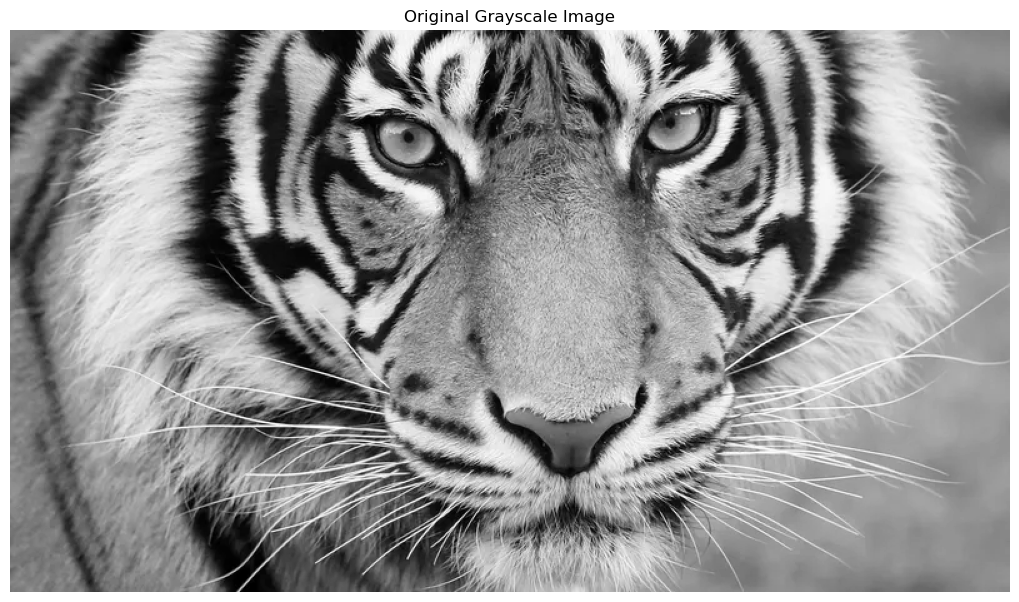

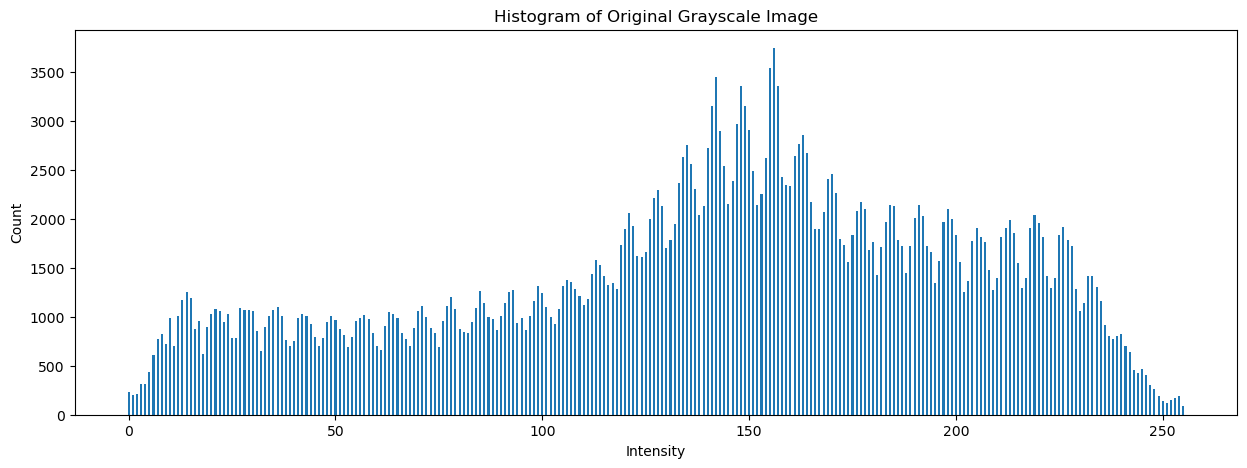

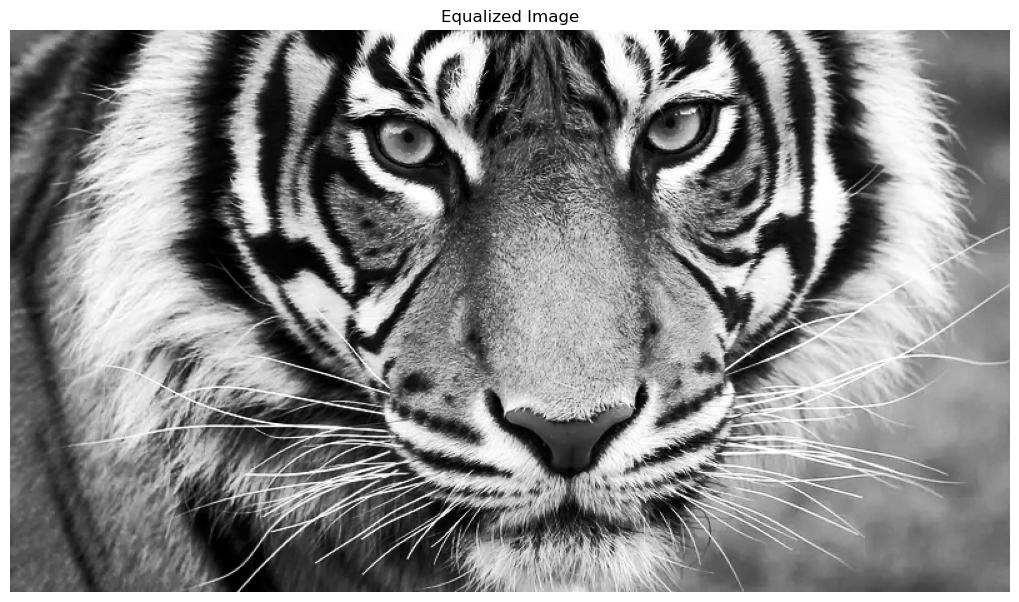

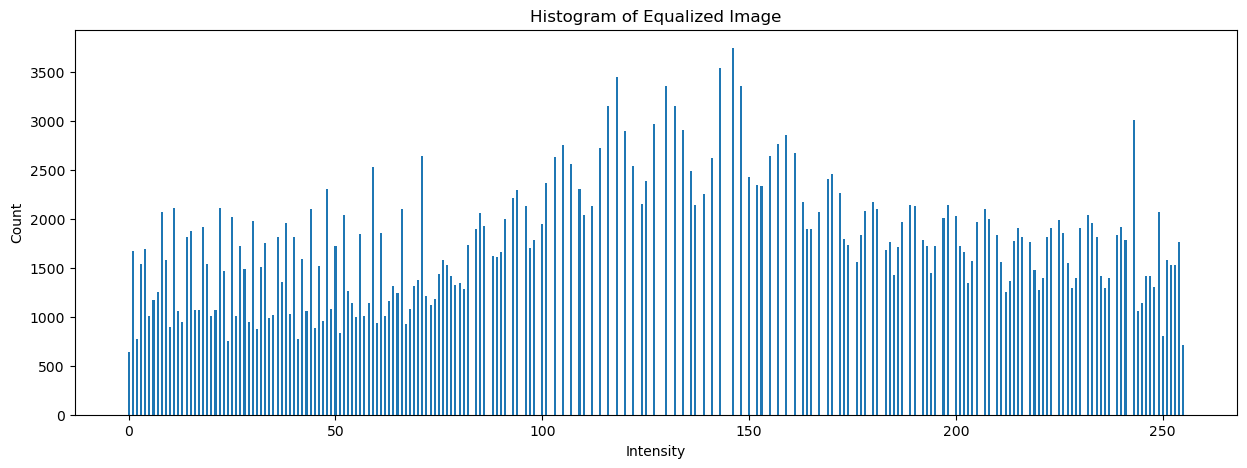

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Main variables
image_path = "C:\\Users\\Student\\Downloads\\numbers-tiger-populations.webp"
G = 256

# Functions

# Function to plot image
# Source: https://stackoverflow.com/a/42314798
def plotimage(img, title=None, figsize=None):
    h = img.shape[0]
    w = img.shape[1]
    dpi = 80
    if figsize is None:
        figsize = w / float(dpi), h / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    ax.axis('off')
    ax.imshow(img, cmap='gray')
    if title:
        plt.title(title)
    plt.show()

# Function to compute histogram
def histogram(gray):
    hist = np.zeros(G, dtype=int)
    h, w = gray.shape
    for i in range(h):
        for j in range(w):
            hist[gray[i, j]] += 1
    return hist

# Function to plot histogram
def plot_histogram(hist, width=0.5, figsize=(15, 5), xlabel='Intensity', ylabel='Count', title='Histogram'):
    plt.figure(figsize=figsize)
    plt.bar(np.arange(G), hist, width=width)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Function for histogram equalization
def histogram_equalization(image):
    equ = cv2.equalizeHist(image)
    return equ

# Load the image
image = cv2.imread("C:\\Users\\Student\\Downloads\\numbers-tiger-populations.webp")

# Convert image to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Check if image loading was successful
if image_gray is None:
    print('Failed to load image from {"C:\\Users\\Student\\Downloads\\numbers-tiger-populations.webp"}')
else:
    # Display the original image
    plotimage(image_gray, title='Original Grayscale Image')

    # Compute and plot histogram of original image
    hist_original = histogram(image_gray)
    plot_histogram(hist_original, title='Histogram of Original Grayscale Image')

    # Perform histogram equalization
    equ = histogram_equalization(image_gray)

    # Display the equalized image
    plotimage(equ, title='Equalized Image')

    # Compute and plot histogram of equalized image
    hist_equalized = histogram(equ)
    plot_histogram(hist_equalized, title='Histogram of Equalized Image')



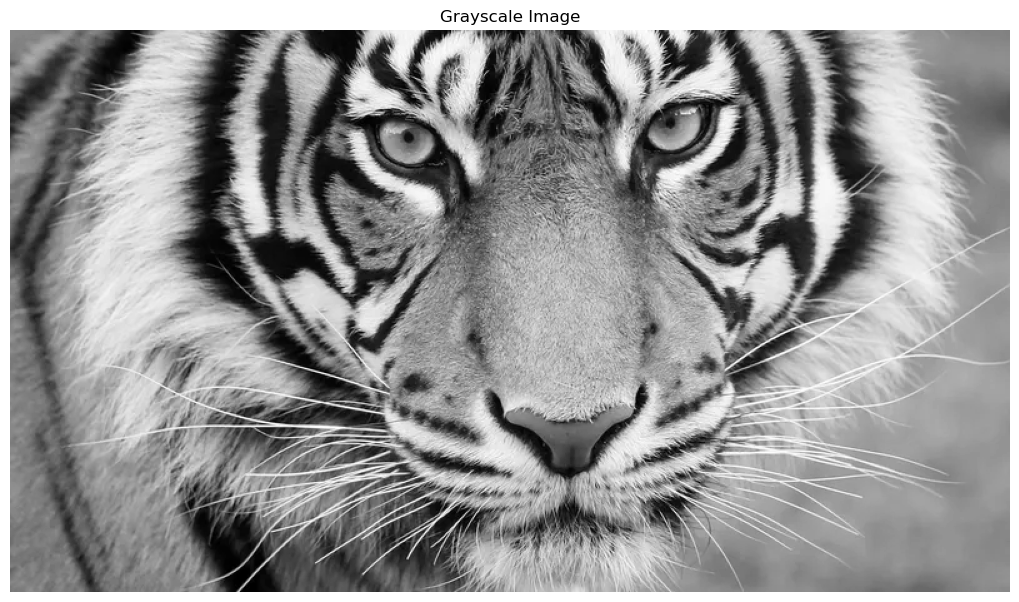

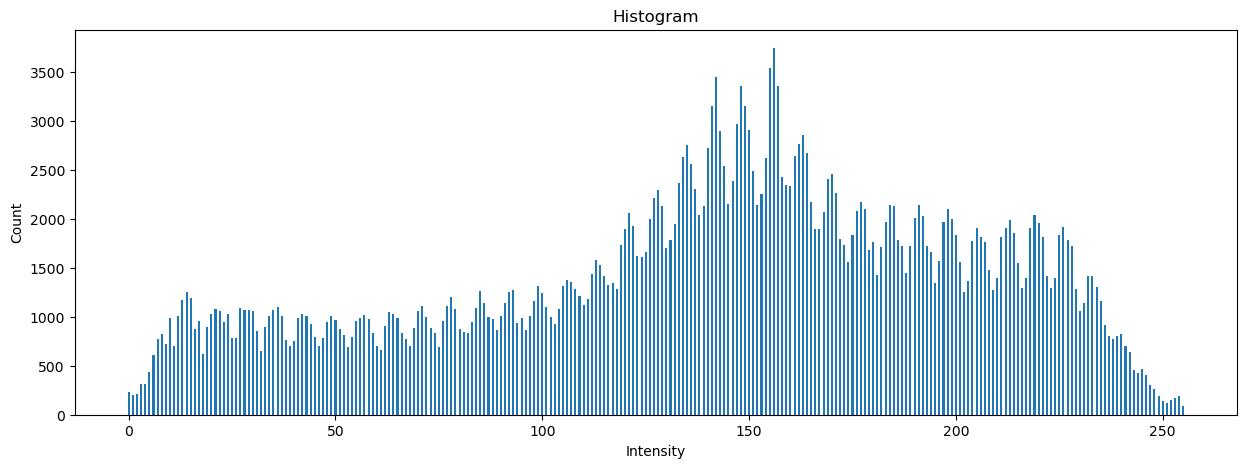

In [6]:
img = cv2.imread("C:\\Users\\Student\\Downloads\\numbers-tiger-populations.webp")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plotimage(gray, 'Grayscale Image')
hist = histogram(gray)
plot_histogram(hist)


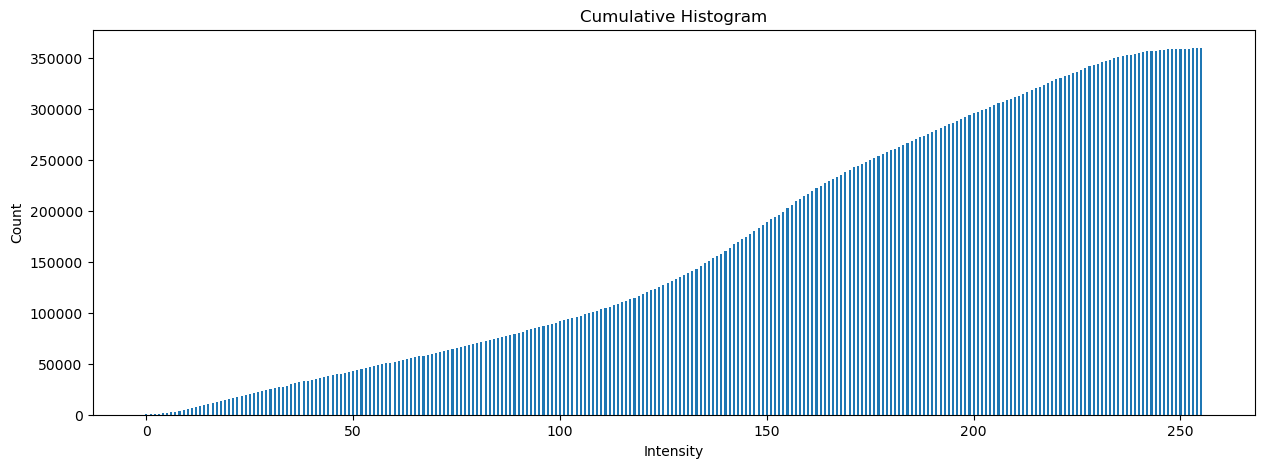

In [7]:
hist_cum = hist.copy()
for i in range(1,len(hist)):
 hist_cum[i]+=hist_cum[i-1]
plot_histogram(hist_cum,title='Cumulative Histogram')


After Histogram Equalization:


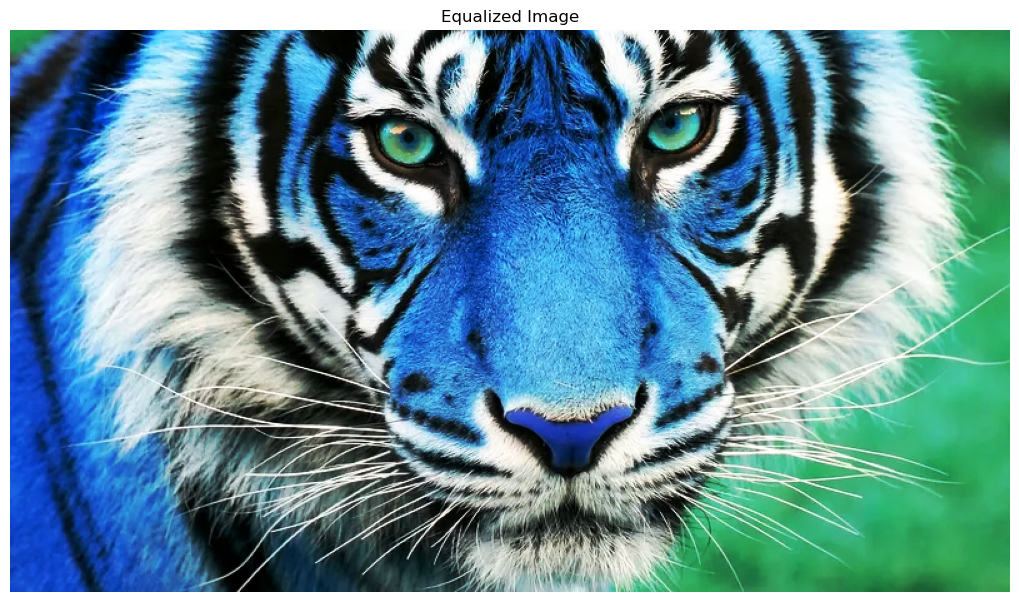

In [9]:
    G = 256
    t = np.round((G-1) / (image.shape[0] * image.shape[1]) * hist_cum)
    t = t.astype(np.uint8)

    # Transform image using CDF
    output = image.copy()
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            output[i,j] = t[output[i,j]]

    # Display the equalized image
    print("\nAfter Histogram Equalization:")
    plotimage(output, title='Equalized Image')